## 1. Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries loaded successfully
Analysis Date: 2025-12-14 01:58:40


## 2. Data Ingestion

In [3]:
# Load the Telco Customer Churn dataset
df = pd.read_csv('../data/raw/Telco_Customer_Churn_Dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (7043, 21)
Total Records: 7,043
Total Features: 21

Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [4]:
# Display first few records
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# Data types and memory usage
print("Data Types:")
print(df.dtypes)
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Memory Usage: 6.82 MB


## 3. Data Cleaning and Transformation

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Check for blank strings in TotalCharges
blank_total_charges = (df['TotalCharges'] == ' ').sum()
print(f"\nBlank TotalCharges values: {blank_total_charges}")

Missing Values:
Series([], dtype: int64)

Blank TotalCharges values: 11


In [7]:
# Clean the dataset
df_clean = df.copy()

# Remove customerID (not a feature)
df_clean = df_clean.drop(columns=['customerID'])

# Convert TotalCharges to numeric
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df_clean = df_clean.dropna(subset=['TotalCharges'])

print(f"Records after cleaning: {len(df_clean):,}")
print(f"Records removed: {len(df) - len(df_clean)}")

Records after cleaning: 7,032
Records removed: 11


## 4. SQL-Style Data Querying with Pandas

Using Pandas to demonstrate SQL-equivalent operations for data analysis.

In [8]:
# Query 1: Churn Distribution (SELECT COUNT GROUP BY)
print("=" * 60)
print("QUERY 1: Churn Distribution")
print("SQL Equivalent: SELECT Churn, COUNT(*) FROM telco GROUP BY Churn")
print("=" * 60)

churn_dist = df_clean.groupby('Churn').agg(
    total_customers=('Churn', 'count')
).reset_index()

churn_dist['percentage'] = (churn_dist['total_customers'] / churn_dist['total_customers'].sum() * 100).round(2)
print(churn_dist)

churn_rate = (df_clean['Churn'] == 'Yes').mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

QUERY 1: Churn Distribution
SQL Equivalent: SELECT Churn, COUNT(*) FROM telco GROUP BY Churn
  Churn  total_customers  percentage
0    No             5163       73.42
1   Yes             1869       26.58

Overall Churn Rate: 26.58%


In [9]:
# Query 2: Churn by Contract Type
print("=" * 60)
print("QUERY 2: Churn by Contract Type")
print("SQL: SELECT Contract, COUNT(*), SUM(CASE WHEN Churn='Yes'), churn_rate")
print("=" * 60)

contract_analysis = df_clean.groupby('Contract').agg(
    total_customers=('Churn', 'count'),
    churned=('Churn', lambda x: (x == 'Yes').sum()),
    retained=('Churn', lambda x: (x == 'No').sum())
).reset_index()

contract_analysis['churn_rate'] = (contract_analysis['churned'] / contract_analysis['total_customers'] * 100).round(2)
contract_analysis = contract_analysis.sort_values('churn_rate', ascending=False)

print(contract_analysis)

QUERY 2: Churn by Contract Type
SQL: SELECT Contract, COUNT(*), SUM(CASE WHEN Churn='Yes'), churn_rate
         Contract  total_customers  churned  retained  churn_rate
0  Month-to-month             3875     1655      2220       42.71
1        One year             1472      166      1306       11.28
2        Two year             1685       48      1637        2.85


In [10]:
# Query 3: Churn by Internet Service
print("=" * 60)
print("QUERY 3: Churn by Internet Service")
print("=" * 60)

internet_analysis = df_clean.groupby('InternetService').agg(
    total_customers=('Churn', 'count'),
    churned=('Churn', lambda x: (x == 'Yes').sum()),
    avg_monthly_charges=('MonthlyCharges', 'mean')
).reset_index()

internet_analysis['churn_rate'] = (internet_analysis['churned'] / internet_analysis['total_customers'] * 100).round(2)
internet_analysis['avg_monthly_charges'] = internet_analysis['avg_monthly_charges'].round(2)
internet_analysis = internet_analysis.sort_values('churn_rate', ascending=False)

print(internet_analysis)

QUERY 3: Churn by Internet Service
  InternetService  total_customers  churned  avg_monthly_charges  churn_rate
1     Fiber optic             3096     1297                91.50       41.89
0             DSL             2416      459                58.09       19.00
2              No             1520      113                21.08        7.43


In [11]:
# Query 4: Churn by Payment Method
print("=" * 60)
print("QUERY 4: Churn by Payment Method")
print("=" * 60)

payment_analysis = df_clean.groupby('PaymentMethod').agg(
    total_customers=('Churn', 'count'),
    churned=('Churn', lambda x: (x == 'Yes').sum()),
    avg_monthly=('MonthlyCharges', 'mean'),
    avg_total=('TotalCharges', 'mean')
).reset_index()

payment_analysis['churn_rate'] = (payment_analysis['churned'] / payment_analysis['total_customers'] * 100).round(2)
payment_analysis = payment_analysis.sort_values('churn_rate', ascending=False)

print(payment_analysis)

QUERY 4: Churn by Payment Method
               PaymentMethod  total_customers  churned  avg_monthly  \
2           Electronic check             2365     1071    76.255814   
3               Mailed check             1604      308    43.958354   
0  Bank transfer (automatic)             1542      258    67.205577   
1    Credit card (automatic)             1521      232    66.519264   

     avg_total  churn_rate  
2  2090.868182       45.29  
3  1054.483915       19.20  
0  3079.299546       16.73  
1  3071.396022       15.25  


In [12]:
# Query 5: Revenue Analysis
print("=" * 60)
print("QUERY 5: Revenue Analysis by Churn Status")
print("=" * 60)

revenue_analysis = df_clean.groupby('Churn').agg(
    customer_count=('Churn', 'count'),
    total_monthly_revenue=('MonthlyCharges', 'sum'),
    avg_monthly_charges=('MonthlyCharges', 'mean'),
    total_lifetime_revenue=('TotalCharges', 'sum'),
    avg_tenure=('tenure', 'mean')
).reset_index()

revenue_analysis['total_monthly_revenue'] = revenue_analysis['total_monthly_revenue'].round(2)
revenue_analysis['avg_monthly_charges'] = revenue_analysis['avg_monthly_charges'].round(2)
revenue_analysis['total_lifetime_revenue'] = revenue_analysis['total_lifetime_revenue'].round(2)
revenue_analysis['avg_tenure'] = revenue_analysis['avg_tenure'].round(1)

print(revenue_analysis)

# Calculate revenue at risk
churned_monthly = revenue_analysis[revenue_analysis['Churn'] == 'Yes']['total_monthly_revenue'].values[0]
print(f"\nMonthly Revenue at Risk: ${churned_monthly:,.2f}")
print(f"Annual Revenue at Risk: ${churned_monthly * 12:,.2f}")

QUERY 5: Revenue Analysis by Churn Status
  Churn  customer_count  total_monthly_revenue  avg_monthly_charges  \
0    No            5163              316530.15                61.31   
1   Yes            1869              139130.85                74.44   

   total_lifetime_revenue  avg_tenure  
0              13193241.8        37.7  
1               2862926.9        18.0  

Monthly Revenue at Risk: $139,130.85
Annual Revenue at Risk: $1,669,570.20


## 5. Feature Engineering

In [13]:
# Create tenure buckets
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'New (0-12 months)'
    elif tenure <= 24:
        return 'Growing (13-24 months)'
    elif tenure <= 48:
        return 'Established (25-48 months)'
    else:
        return 'Loyal (49+ months)'

df_clean['tenure_bucket'] = df_clean['tenure'].apply(categorize_tenure)

# Churn by tenure bucket
tenure_analysis = df_clean.groupby('tenure_bucket').agg(
    total_customers=('Churn', 'count'),
    churned=('Churn', lambda x: (x == 'Yes').sum())
).reset_index()

tenure_analysis['churn_rate'] = (tenure_analysis['churned'] / tenure_analysis['total_customers'] * 100).round(2)
print("Churn by Tenure Bucket:")
print(tenure_analysis.sort_values('churn_rate', ascending=False))

Churn by Tenure Bucket:
                tenure_bucket  total_customers  churned  churn_rate
3           New (0-12 months)             2175     1037       47.68
1      Growing (13-24 months)             1024      294       28.71
0  Established (25-48 months)             1594      325       20.39
2          Loyal (49+ months)             2239      213        9.51


In [14]:
# Service adoption score
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

def count_services(row):
    count = 0
    for col in service_cols:
        if row[col] in ['Yes', 'Fiber optic', 'DSL']:
            count += 1
    return count

df_clean['service_count'] = df_clean.apply(count_services, axis=1)

# High value customer flag
df_clean['high_value'] = (df_clean['MonthlyCharges'] > 70).map({True: 'Yes', False: 'No'})

print("Feature Engineering Complete")
print(f"New columns added: tenure_bucket, service_count, high_value")
print(f"\nService count distribution:")
print(df_clean['service_count'].value_counts().sort_index())

Feature Engineering Complete
New columns added: tenure_bucket, service_count, high_value

Service count distribution:
service_count
1    1260
2     857
3     846
4     965
5     921
6     906
7     674
8     395
9     208
Name: count, dtype: int64


## 6. Data Visualization

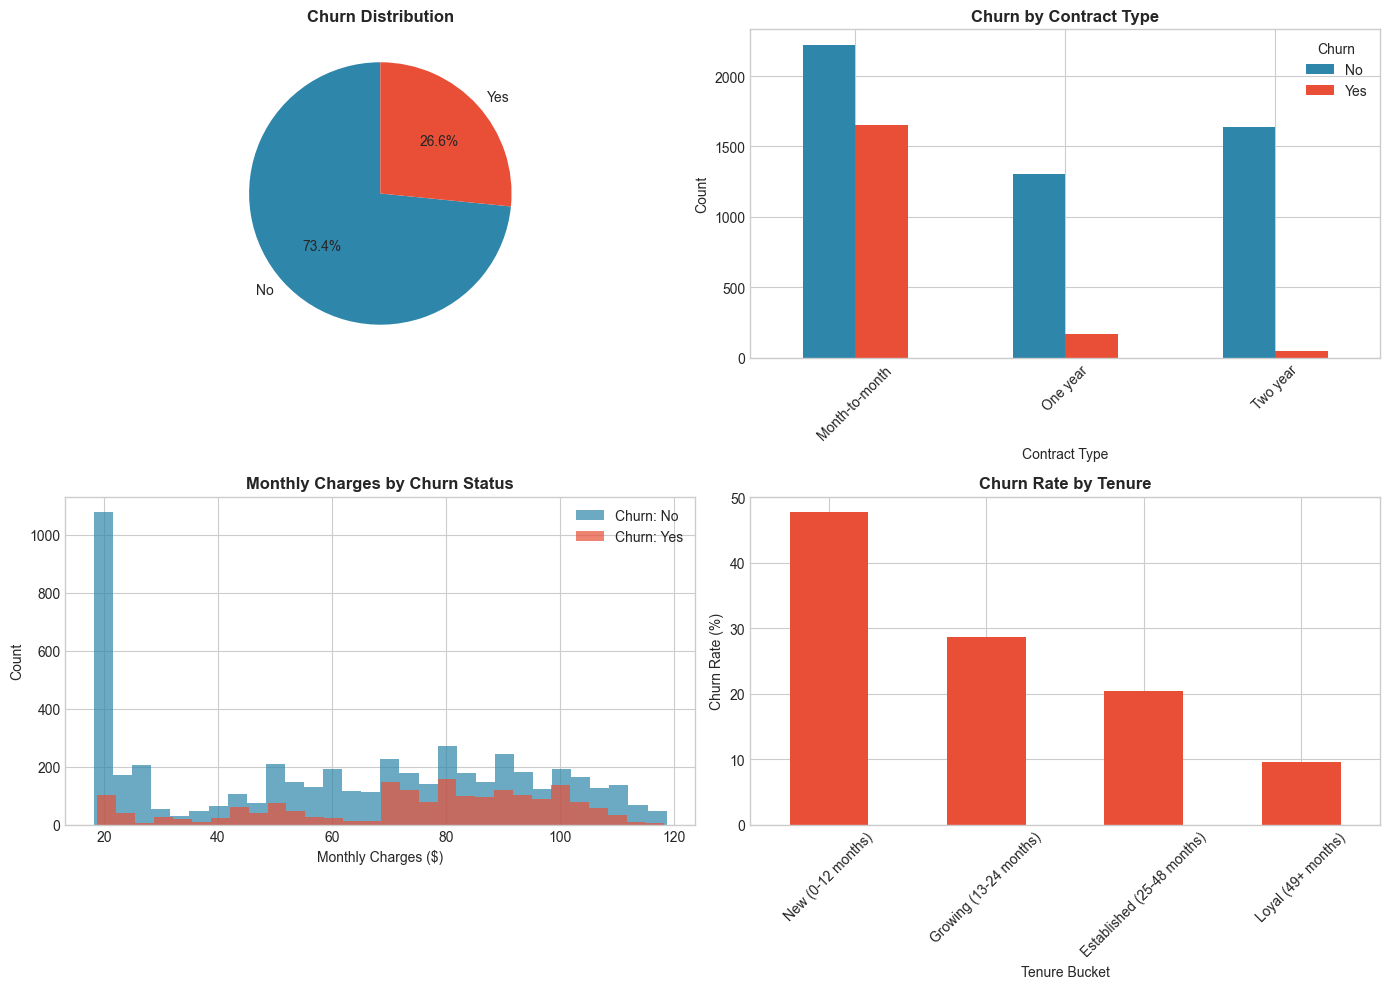

Visualization saved to: ../artifacts/data_processing_visualizations.png


In [15]:
# Set style
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#2E86AB', '#E94F37', '#4ECDC4', '#FFC107']

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Churn Distribution
churn_counts = df_clean['Churn'].value_counts()
axes[0, 0].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
               colors=['#2E86AB', '#E94F37'], startangle=90)
axes[0, 0].set_title('Churn Distribution', fontsize=12, fontweight='bold')

# Plot 2: Churn by Contract
contract_churn = df_clean.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract_churn.plot(kind='bar', ax=axes[0, 1], color=['#2E86AB', '#E94F37'])
axes[0, 1].set_title('Churn by Contract Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Contract Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Churn')

# Plot 3: Monthly Charges Distribution
for churn_status, color in zip(['No', 'Yes'], ['#2E86AB', '#E94F37']):
    subset = df_clean[df_clean['Churn'] == churn_status]['MonthlyCharges']
    axes[1, 0].hist(subset, bins=30, alpha=0.7, label=f'Churn: {churn_status}', color=color)
axes[1, 0].set_title('Monthly Charges by Churn Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Monthly Charges ($)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend()

# Plot 4: Tenure vs Churn Rate
tenure_churn = df_clean.groupby('tenure_bucket')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
tenure_order = ['New (0-12 months)', 'Growing (13-24 months)', 'Established (25-48 months)', 'Loyal (49+ months)']
tenure_churn = tenure_churn.reindex(tenure_order)
tenure_churn.plot(kind='bar', ax=axes[1, 1], color='#E94F37')
axes[1, 1].set_title('Churn Rate by Tenure', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tenure Bucket')
axes[1, 1].set_ylabel('Churn Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../artifacts/data_processing_visualizations.png', dpi=150, bbox_inches='tight')
plt.show()

print("Visualization saved to: ../artifacts/data_processing_visualizations.png")

## 7. Export Processed Data

In [16]:
# Save processed dataset
output_path = '../data/processed/telco_churn_processed.csv'
df_clean.to_csv(output_path, index=False)

print(f"Processed data saved to: {output_path}")
print(f"Total records: {len(df_clean):,}")
print(f"Total features: {len(df_clean.columns)}")
print(f"\nFeature list:")
print(df_clean.columns.tolist())

Processed data saved to: ../data/processed/telco_churn_processed.csv
Total records: 7,032
Total features: 23

Feature list:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_bucket', 'service_count', 'high_value']


## 8. Summary Statistics

In [17]:
print("=" * 60)
print("DATA PROCESSING SUMMARY")
print("=" * 60)
print(f"Original Records: {len(df):,}")
print(f"Cleaned Records: {len(df_clean):,}")
print(f"Records Removed: {len(df) - len(df_clean)}")
print(f"\nChurn Statistics:")
print(f"  - Churn Rate: {(df_clean['Churn'] == 'Yes').mean() * 100:.2f}%")
print(f"  - Churned Customers: {(df_clean['Churn'] == 'Yes').sum():,}")
print(f"  - Retained Customers: {(df_clean['Churn'] == 'No').sum():,}")
print(f"\nRevenue Metrics:")
print(f"  - Total Monthly Revenue: ${df_clean['MonthlyCharges'].sum():,.2f}")
print(f"  - Avg Monthly Charges: ${df_clean['MonthlyCharges'].mean():.2f}")
print(f"  - Total Lifetime Revenue: ${df_clean['TotalCharges'].sum():,.2f}")
print("=" * 60)

DATA PROCESSING SUMMARY
Original Records: 7,043
Cleaned Records: 7,032
Records Removed: 11

Churn Statistics:
  - Churn Rate: 26.58%
  - Churned Customers: 1,869
  - Retained Customers: 5,163

Revenue Metrics:
  - Total Monthly Revenue: $455,661.00
  - Avg Monthly Charges: $64.80
  - Total Lifetime Revenue: $16,056,168.70


---
**End of Data Processing Notebook**

This notebook demonstrates:
- Data ingestion from CSV
- Data cleaning and transformation
- SQL-style querying with Pandas
- Feature engineering
- Data visualization
- Export of processed data